In [103]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error

car_df = pd.read_csv(r'C:\Users\HP\My_projects\car_price_predictor\car_price_dataset_PW.csv')

In [104]:
car_df.head(3)

,Unnamed: 0,title,price,city,model,mileage,fuel_type,transmission,registered,color,assembly,engine_capacity,post_date,price_category,mileage_category,post_day_of_week,vehicle_age
0,0,Honda N One Premium 2014,2650000,Lahore,2014,82000,Petrol,Automatic,Lahore,Blue,Imported,660,2024-05-04,Medium,Medium,Saturday,10
1,1,Nissan Note 2020,5400000,Lahore,2020,59000,Hybrid,Automatic,Un-Registered,Silver,Imported,1200,2024-05-04,High,Medium,Saturday,4
2,2,Suzuki Vitara GLX 1.6 2017,0,Karachi,2017,67000,Petrol,Automatic,Karachi,Grey,Imported,1600,2024-05-04,Low,Medium,Saturday,7


<Axes: >

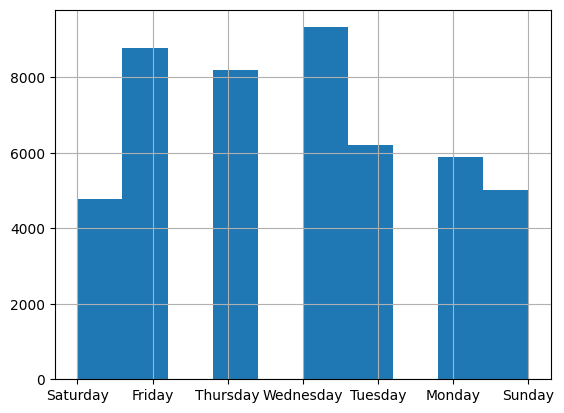

In [105]:
car_df['post_day_of_week'].hist()

In [106]:
index_price_0 = car_df['title'][car_df['price'] == 0].index
car_df.drop(index_price_0,axis=0,inplace=True)

In [107]:
car_df['transmission'][car_df['transmission']=='Not Available'] = 'Manual'

C:\Users\HP\AppData\Local\Temp\ipykernel_2208\4121848710.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  car_df['transmission'][car_df['transmission']=='Not Available'] = 'Manual'
C:\Users\HP\AppData\Local\Temp\ipykernel_2208\4121848710.

In [108]:
new_df = car_df.drop(['title','post_day_of_week','post_date','price_category','mileage_category','city'],axis=1)
encoders = {}
for i in new_df.columns:
    le = LabelEncoder()
    if new_df[i].dtype == 'object':  # Check if the column's dtype is 'object'
        new_df[i] = le.fit_transform(new_df[i])  # Apply label encoding
        encoders[i] = le

In [109]:
encoders["fuel_type"].classes_

array(['Diesel', 'Hybrid', 'Not Available', 'Petrol'], dtype=object)

In [110]:
X = new_df.drop('price',axis=1)
X.drop('Unnamed: 0', axis=1, inplace=True)
y = new_df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [115]:
X_test.columns

Index(['model', 'mileage', 'fuel_type', 'transmission', 'registered', 'color',
       'assembly', 'engine_capacity', 'vehicle_age'],
      dtype='object')

In [112]:
xgb = XGBRegressor(random_state=42)
model = xgb.fit(X,y)
# pre = xgb.predict(X_test)


In [113]:
X.head(3)

,model,mileage,fuel_type,transmission,registered,color,assembly,engine_capacity,vehicle_age
0,2014,82000,3,0,47,66,0,660,10
1,2020,59000,1,0,92,659,0,1200,4
3,2021,41000,1,0,92,41,0,1500,3


In [114]:
import pickle
with open("model_car.pkl",'wb') as f:
    pickle.dump(model,f)
with open("car_price_encoders.pkl", "wb") as f:
    pickle.dump(encoders, f)